In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-question-pairs/test.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/glove6b200d/glove.6B.200d.txt


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

Using TensorFlow backend.


In [ ]:
df = pd.read_csv('../input/quora-question-pairs/train.csv.zip')

In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [ ]:
test_data = pd.read_csv('../input/quora-question-pairs/test.csv.zip')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
test_data.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [ ]:
X_train = df.iloc[:,:5].values
Y_train = df.iloc[:,5:].values

In [ ]:
X_testq1 = test_data.iloc[:400001,1:2].values
X_testq2 = test_data.iloc[:400001, 2:].values

In [ ]:
s=X_train[:,3:5]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_validation, Y_train, Y_validation = train_test_split(s, Y_train, test_size=0.2)

In [ ]:
X_train

array([['What are the effects of a venomous snake bite?',
        'How can my profile get 80% tuition scholarship for an MA in Communication in US?'],
       ['You say scent particles are just like gas particles. Does it mean that scent (smell) is a constituent of air?',
        'How safe is it to go to Seychelles for a week?'],
       ['Two cards were drawn without a replacement from a pack of 52 cards. What is the probability that they are both kings or both queens?',
        'Two cards were drawn, without replacement, from a pack of 52 cards. What is the probability that they are both Kings or both Queen?'],
       ...,
       ['What are all the possible formats of USPS tracking numbers?',
        'How do you track a US priority mail package without a tracking number?'],
       ['What is the coldest temperature ever recorded in London?',
        "What is Germany's coldest city?"],
       ['What are the applications of set theory in logic?',
        'What are some real-life applicati

In [ ]:
s1 = X_train[:,0]
s2 = X_train[:,1]

In [ ]:
s3 = X_validation[:,0]
s4 = X_validation[:,1]

In [ ]:
MAX_NB_WORDS = 200000
tokenizer = Tokenizer(num_words = MAX_NB_WORDS)
tokenizer.fit_on_texts(list(s1.astype(str))+list(s2.astype(str)))

In [ ]:
X_train_q1 = tokenizer.texts_to_sequences(s1.astype(str))
X_train_q1 = pad_sequences(X_train_q1, maxlen = 30, padding='post')

# X_train_q2 = tokenizer.texts_to_sequences(np.array(listq2))
X_train_q2 = tokenizer.texts_to_sequences(s2.astype(str))
X_train_q2 = pad_sequences(X_train_q2, maxlen = 30, padding='post')

In [ ]:
X_validation_q1 = tokenizer.texts_to_sequences(s3.astype(str))
X_validation_q1 = pad_sequences(X_validation_q1, maxlen = 30, padding='post')

# X_train_q2 = tokenizer.texts_to_sequences(np.array(listq2))
X_validation_q2 = tokenizer.texts_to_sequences(s4.astype(str))
X_validation_q2 = pad_sequences(X_validation_q2, maxlen = 30, padding='post')

In [ ]:
X_test_q1 = tokenizer.texts_to_sequences(X_testq1.astype(str).ravel())
X_test_q1 = pad_sequences(X_test_q1,maxlen = 30, padding='post')

X_test_q2 = tokenizer.texts_to_sequences(X_testq2.astype(str).ravel())
X_test_q2 = pad_sequences(X_test_q2, maxlen = 30, padding='post')

In [ ]:
word_index = tokenizer.word_index


In [ ]:
embedding_index = {}
with open('../input/glove6b200d/glove.6B.200d.txt','r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding_index[word] = vectors
    f.close()

In [ ]:
embedding_matrix = np.random.random((len(word_index)+1, 200))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
n_hidden = 50
gradient_clipping_norm = 1.25
batch_size = 64
n_epoch = 25

In [ ]:
from keras import backend as K

In [ ]:

def exponent_neg_manhattan_distance(left, right):
    ''' Helper function for the similarity estimate of the LSTMs outputs'''
    return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))


In [ ]:
max_seq_length=30

In [ ]:
from keras.models import Model
from keras.optimizers import Adadelta

In [ ]:
len(embedding_matrix)

86423

In [ ]:
len(word_index)

86422

In [ ]:




# The visible layer
left_input = Input(shape=(max_seq_length,), dtype='int32')
right_input = Input(shape=(max_seq_length,), dtype='int32')

embedding_layer = Embedding(len(word_index)+1,200, weights=[embedding_matrix], input_length=max_seq_length, trainable=False)

# Embedded version of the inputs
encoded_left = embedding_layer(left_input)
encoded_right = embedding_layer(right_input)

# Since this is a siamese network, both sides share the same LSTM
shared_lstm = LSTM(n_hidden)

left_output = shared_lstm(encoded_left)
right_output = shared_lstm(encoded_right)

# Calculates the distance as defined by the MaLSTM model
malstm_distance = Lambda(function=lambda x: exponent_neg_manhattan_distance(x[0], x[1]),output_shape=lambda x: (x[0][0], 1))([left_output, right_output])

# Pack it all up into a model
malstm = Model([left_input, right_input], [malstm_distance])

# Adadelta optimizer, with gradient clipping by norm
optimizer = Adadelta(clipnorm=gradient_clipping_norm)








In [ ]:
malstm.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
malstm_trained = malstm.fit([X_train_q1,X_train_q2],Y_train, batch_size=batch_size, epochs=n_epoch,
                            validation_data=([X_validation_q1, X_validation_q2], Y_validation))


Epoch 1/25
5054/5054 [==============================] - 51s 10ms/step - loss: 0.2677 - accuracy: 0.5928 - val_loss: 0.2223 - val_accuracy: 0.6471
Epoch 2/25
5054/5054 [==============================] - 49s 10ms/step - loss: 0.2165 - accuracy: 0.6584 - val_loss: 0.2151 - val_accuracy: 0.6615
Epoch 3/25
5054/5054 [==============================] - 48s 9ms/step - loss: 0.2123 - accuracy: 0.6670 - val_loss: 0.2126 - val_accuracy: 0.6671
Epoch 4/25
5054/5054 [==============================] - 48s 9ms/step - loss: 0.2103 - accuracy: 0.6711 - val_loss: 0.2108 - val_accuracy: 0.6703
Epoch 5/25
5054/5054 [==============================] - 48s 9ms/step - loss: 0.2087 - accuracy: 0.6748 - val_loss: 0.2094 - val_accuracy: 0.6737
Epoch 6/25
5054/5054 [==============================] - 47s 9ms/step - loss: 0.2074 - accuracy: 0.6772 - val_loss: 0.2081 - val_accuracy: 0.6763
Epoch 7/25
5054/5054 [==============================] - 46s 9ms/step - loss: 0.2061 - accuracy: 0.6795 - val_loss: 0.2070 - val_

In [ ]:
malstm.save("test.h5")

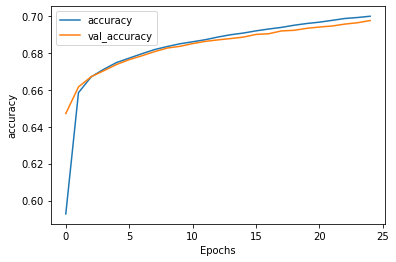

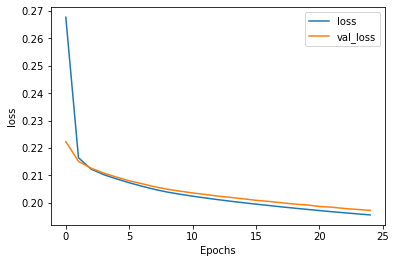

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(malstm_trained, 'accuracy')
plot_graphs(malstm_trained, 'loss')

In [ ]:
l=pd.read_csv('../input/quora-question-pairs/sample_submission.csv.zip')

In [ ]:
l.head()

,test_id,is_duplicate
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [ ]:
y=model.predict([X_test_q1,X_test_q2])

In [ ]:
p=[]

In [ ]:
for x in x:
  if(x>0.5):
    p.append(1)
  else:
    p.append(0)

In [ ]:
malstm.save_weights('quora.h5')

In [ ]:
from keras.models import load_model
model=load_model('./test.h5')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 200)      17284600    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 50)           50200       embedding[0][0]              